In [1]:
import pandas as pd
import pickle
import glob
import re

from copy import deepcopy

import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
import re

In [16]:
import numpy as np

In [8]:
from collections import Counter

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
from sklearn.linear_model import LogisticRegression

In [137]:
from sklearn.dummy import DummyClassifier

In [143]:
from sklearn import metrics

In [153]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict,GridSearchCV

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [403]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!pwd

/home/farhaan/working_projects/rough_proj_git


In [3]:
cali_collision_records_df = pd.read_csv('../calicollision/CollisionRecords.txt')

/home/farhaan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,14,15,17,26,29,30,32,33,34,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [154]:
cali_collision_records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437692 entries, 0 to 437691
Data columns (total 76 columns):
CASE_ID                    437692 non-null int64
ACCIDENT_YEAR              437692 non-null int64
PROC_DATE                  437692 non-null int64
JURIS                      437692 non-null object
COLLISION_DATE             437692 non-null int64
COLLISION_TIME             437692 non-null int64
OFFICER_ID                 436944 non-null object
REPORTING_DISTRICT         170081 non-null object
DAY_OF_WEEK                437692 non-null int64
CHP_SHIFT                  437692 non-null int64
POPULATION                 437692 non-null int64
CNTY_CITY_LOC              437692 non-null int64
SPECIAL_COND               437692 non-null int64
BEAT_TYPE                  437692 non-null int64
CHP_BEAT_TYPE              437692 non-null object
CITY_DIVISION_LAPD         28813 non-null object
CHP_BEAT_CLASS             437692 non-null int64
BEAT_NUMBER                409916 non-null object
PR

In [265]:
cali_collision_records_df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_PED_KILLED,COUNT_PED_INJURED,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE
0,6292116,2015,20150424,3300,20150102,1844,3775,602E3,5,5,...,1,0,0,0,0,0,-,-,NaN,NaN
1,6292117,2015,20160108,9390,20150104,1817,20587,NaN,7,2,...,0,0,0,0,0,0,-,-,37.61089,121.82204
2,6292118,2015,20150429,9390,20150105,1650,20557,NaN,1,2,...,0,0,0,0,0,0,-,-,37.50050,121.92909
3,6292119,2015,20150424,0103,20150113,1843,8,30,2,5,...,0,0,1,0,0,0,-,-,NaN,NaN
4,6292120,2015,20150429,9525,20150115,1350,16679,NaN,4,1,...,0,0,0,0,0,0,TO,-,34.07225,117.78874


cali_collision_records_df_dummies = cali_collision_records_df.loc[:,['CASE_ID','COLLISION_DATE',
       'COLLISION_TIME','DAY_OF_WEEK',
       'POPULATION', 
       'WEATHER_1', 'WEATHER_2', 'LOCATION_TYPE', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_VIOL_CATEGORY',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'PEDESTRIAN_ACCIDENT',
       'BICYCLE_ACCIDENT', 'MOTORCYCLE_ACCIDENT', 'TRUCK_ACCIDENT',
       'NOT_PRIVATE_PROPERTY', 'ALCOHOL_INVOLVED',
       'COUNT_SEVERE_INJ', 'COUNT_VISIBLE_INJ',
       'COUNT_COMPLAINT_PAIN', 'COUNT_PED_KILLED', 'COUNT_PED_INJURED',
       'COUNT_BICYCLIST_KILLED', 'COUNT_BICYCLIST_INJURED', 'COUNT_MC_KILLED',
       'COUNT_MC_INJURED','LATITUDE','LONGITUDE']]

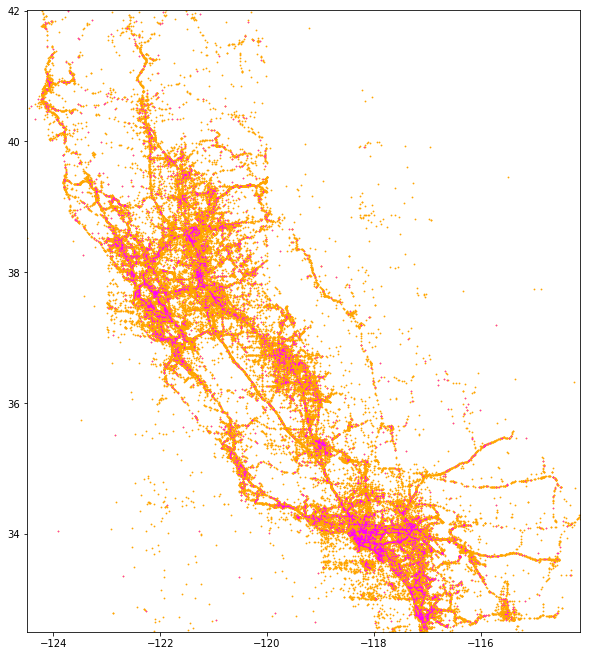

In [831]:
plt.figure(figsize=(6.611*1.5,7.625*1.5))
plt.xlim(-124.49479,-114.13892)
plt.ylim(32.501,42.00931)
plt.plot(-1*cali_collision_records_df['LONGITUDE'],cali_collision_records_df['LATITUDE'],'ko',markersize=.8,color='orange')
plt.plot(cal_latlong_pairs_sev.LONGITUDE,cal_latlong_pairs_sev.LATITUDE,'r.',markersize=.8,color='magenta')

In [948]:
t_df = cali_collision_records_df[cali_collision_records_df.BICYCLE_ACCIDENT=='Y']

t_df = t_df[['LATITUDE','LONGITUDE']]

t_df = t_df.dropna()

In [968]:
t2_df = cali_collision_records_df[cali_collision_records_df.PEDESTRIAN_ACCIDENT=='Y']
t2_df = t_df[['LATITUDE','LONGITUDE']]
t2_df = t_df.dropna()

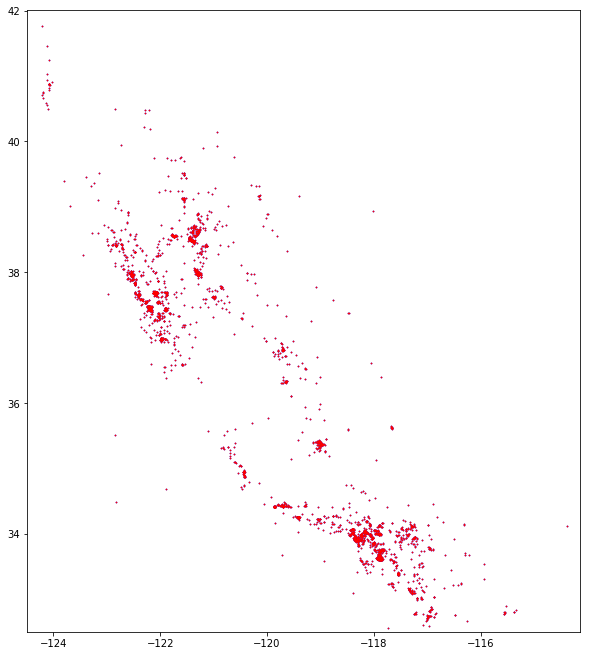

In [977]:
plt.figure(figsize=(6.611*1.5,7.625*1.5))
plt.xlim(-124.49479,-114.13892)
plt.ylim(32.501,42.00931)

plt.plot(-1*t_df.LONGITUDE,t_df.LATITUDE,'bo',-1*t2_df.LONGITUDE,t2_df.LATITUDE,'ro',markersize=.7)
# plt.plot(-1*t2_df.LONGITUDE,t2_df.LATITUDE,'r*',markersize=4)

# plt.plot(cal_latlong_pairs_sev.LONGITUDE,cal_latlong_pairs_sev.LATITUDE,'r.',markersize=.8,color='magenta')

In [778]:
cal_latlong_pairs_sev = pd.DataFrame(cali_collision_records_df.loc[:,['LATITUDE','LONGITUDE','COLLISION_SEVERITY']])

cal_latlong_pairs_sev.dropna(inplace=True)
cal_latlong_pairs_sev = cal_latlong_pairs_sev[(cal_latlong_pairs_sev['COLLISION_SEVERITY']==1) | (cal_latlong_pairs_sev['COLLISION_SEVERITY']==2)]

cal_latlong_pairs_sev['LONGITUDE']= -1*cal_latlong_pairs_sev.LONGITUDE

In [781]:
cal_latlong_pairs_sev

,LATITUDE,LONGITUDE,COLLISION_SEVERITY
1,37.61089,-121.82204,1
2,37.50050,-121.92909,1
4,34.07225,-117.78874,1
5,38.92330,-121.08335,1
8,34.27878,-118.92062,1
10,38.25465,-122.57505,1
11,33.87912,-117.55873,1
12,40.55470,-123.50470,1
13,34.65060,-120.09540,1
16,38.22280,-120.70088,1


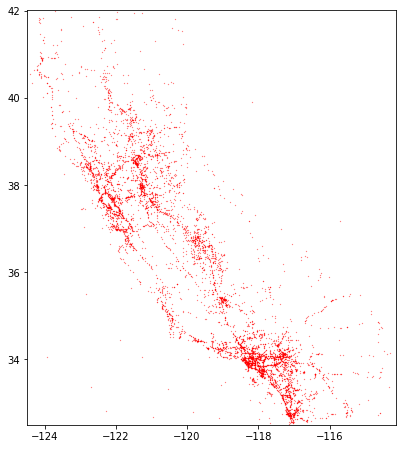

In [961]:
plt.figure(figsize=(6.611,7.625))
plt.xlim(-124.49479,-114.13892)
plt.ylim(32.501,42.00931)
plt.plot(cal_latlong_pairs_sev['LONGITUDE'],cal_latlong_pairs_sev['LATITUDE'],'ro',markersize=.2)

In [779]:
cal_latlong_pairs_sev

,LATITUDE,LONGITUDE,COLLISION_SEVERITY
1,37.61089,-121.82204,1
2,37.50050,-121.92909,1
4,34.07225,-117.78874,1
5,38.92330,-121.08335,1
8,34.27878,-118.92062,1
10,38.25465,-122.57505,1
11,33.87912,-117.55873,1
12,40.55470,-123.50470,1
13,34.65060,-120.09540,1
16,38.22280,-120.70088,1


In [776]:
cali_collision_records_df_dummies.columns

Index(['CASE_ID', 'COLLISION_SEVERITY', 'LATITUDE', 'LONGITUDE',
       'COLLISION_DATE', 'COLLISION_TIME', 'NUMBER_KILLED', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'POPULATION_2', 'POPULATION_3', 'POPULATION_4',
       'POPULATION_5', 'POPULATION_6', 'POPULATION_7', 'POPULATION_9',
       'WEATHER_1_B', 'WEATHER_1_C', 'WEATHER_1_D', 'WEATHER_1_E',
       'WEATHER_1_F', 'WEATHER_1_G', 'ROAD_SURFACE_A', 'ROAD_SURFACE_B',
       'ROAD_SURFACE_C', 'ROAD_SURFACE_D', 'ROAD_COND_1_A', 'ROAD_COND_1_B',
       'ROAD_COND_1_C', 'ROAD_COND_1_D', 'ROAD_COND_1_E', 'ROAD_COND_1_F',
       'ROAD_COND_1_G', 'ROAD_COND_2_H', 'LIGHTING_A', 'LIGHTING_B',
       'LIGHTING_C', 'LIGHTING_D', 'LIGHTING_E', 'ALCOHOL_INVOLVED_Y',
       'PEDESTRIAN_ACCIDENT_Y', 'BICYCLE_ACCIDENT_Y', 'MOTORCYCLE_ACCIDENT_Y',
       'TRUCK_ACCIDENT_Y', 'Is_Fatal', 'Is_SEVERE_or_Fatal'],
      dtype='object')

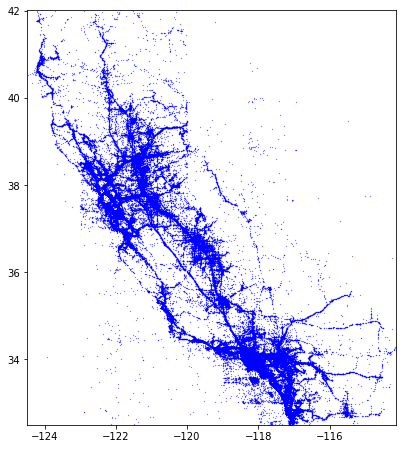

In [774]:
plt.figure(figsize=(6.611,7.625))
plt.xlim(-124.49479,-114.13892)
plt.ylim(32.501,42.00931)
plt.plot(-1*cali_collision_records_df['LONGITUDE'],cali_collision_records_df['LATITUDE'],'bo',markersize=0.2)

In [751]:
cal_latlong_pairs = pd.DataFrame(cali_collision_records_df.loc[:,['LATITUDE','LONGITUDE']])

cal_latlong_pairs.dropna(inplace=True)

cal_latlong_pairs['LONGITUDE']= -1*cal_latlong_pairs.LONGITUDE

cal_latlong_pairs.to_csv('/home/farhaan/working_projects/cali_latlong_points.csv')

In [765]:
dict(cali_collision_records_df_dummies[(cali_collision_records_df_dummies['LATITUDE']==33.53508)])

{'ALCOHOL_INVOLVED_Y': 3603    0
 Name: ALCOHOL_INVOLVED_Y, dtype: uint8, 'BICYCLE_ACCIDENT_Y': 3603    0
 Name: BICYCLE_ACCIDENT_Y, dtype: uint8, 'CASE_ID': 3603    6777910
 Name: CASE_ID, dtype: int64, 'COLLISION_DATE': 3603    20150106
 Name: COLLISION_DATE, dtype: int64, 'COLLISION_SEVERITY': 3603    4
 Name: COLLISION_SEVERITY, dtype: int64, 'COLLISION_TIME': 3603    645
 Name: COLLISION_TIME, dtype: int64, 'DAY_OF_WEEK_2': 3603    1
 Name: DAY_OF_WEEK_2, dtype: uint8, 'DAY_OF_WEEK_3': 3603    0
 Name: DAY_OF_WEEK_3, dtype: uint8, 'DAY_OF_WEEK_4': 3603    0
 Name: DAY_OF_WEEK_4, dtype: uint8, 'DAY_OF_WEEK_5': 3603    0
 Name: DAY_OF_WEEK_5, dtype: uint8, 'DAY_OF_WEEK_6': 3603    0
 Name: DAY_OF_WEEK_6, dtype: uint8, 'DAY_OF_WEEK_7': 3603    0
 Name: DAY_OF_WEEK_7, dtype: uint8, 'Is_Fatal': 3603    0
 Name: Is_Fatal, dtype: int64, 'Is_SEVERE_or_Fatal': 3603    0
 Name: Is_SEVERE_or_Fatal, dtype: int64, 'LATITUDE': 3603    33.53508
 Name: LATITUDE, dtype: float64, 'LIGHTING_A': 3603

In [744]:
print(cali_collision_records_df.LATITUDE.max())
print(cali_collision_records_df.LATITUDE.min())
print(cali_collision_records_df.LONGITUDE.max())
print(cali_collision_records_df.LONGITUDE.min())

42.00931
32.501
124.49479
114.13892


In [450]:
cali_collision_records_df_dummies = cali_collision_records_df.loc[:,
      ['CASE_ID','COLLISION_SEVERITY','LATITUDE','LONGITUDE','COLLISION_DATE',
       'COLLISION_TIME','DAY_OF_WEEK',
       'POPULATION', 
       'WEATHER_1', 'WEATHER_2', 'NUMBER_KILLED',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'ALCOHOL_INVOLVED','PEDESTRIAN_ACCIDENT', 'BICYCLE_ACCIDENT', 'MOTORCYCLE_ACCIDENT', 'TRUCK_ACCIDENT']]

In [451]:
cali_collision_records_df_dummies = pd.get_dummies(cali_collision_records_df_dummies,columns=['DAY_OF_WEEK','POPULATION','WEATHER_1','WEATHER_2',
                                                          'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2',
                                                          'LIGHTING'],drop_first=True)
cali_collision_records_df_dummies = pd.get_dummies(cali_collision_records_df_dummies,columns=['ALCOHOL_INVOLVED','PEDESTRIAN_ACCIDENT', 'BICYCLE_ACCIDENT', 'MOTORCYCLE_ACCIDENT', 'TRUCK_ACCIDENT'])

In [452]:
cali_collision_records_df_dummies.columns

Index(['CASE_ID', 'COLLISION_SEVERITY', 'LATITUDE', 'LONGITUDE',
       'COLLISION_DATE', 'COLLISION_TIME', 'NUMBER_KILLED', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'POPULATION_2', 'POPULATION_3', 'POPULATION_4',
       'POPULATION_5', 'POPULATION_6', 'POPULATION_7', 'POPULATION_9',
       'WEATHER_1_A', 'WEATHER_1_B', 'WEATHER_1_C', 'WEATHER_1_D',
       'WEATHER_1_E', 'WEATHER_1_F', 'WEATHER_1_G', 'WEATHER_2_B',
       'WEATHER_2_C', 'WEATHER_2_D', 'WEATHER_2_E', 'WEATHER_2_F',
       'WEATHER_2_G', 'ROAD_SURFACE_A', 'ROAD_SURFACE_B', 'ROAD_SURFACE_C',
       'ROAD_SURFACE_D', 'ROAD_COND_1_A', 'ROAD_COND_1_B', 'ROAD_COND_1_C',
       'ROAD_COND_1_D', 'ROAD_COND_1_E', 'ROAD_COND_1_F', 'ROAD_COND_1_G',
       'ROAD_COND_1_H', 'ROAD_COND_2_B', 'ROAD_COND_2_C', 'ROAD_COND_2_D',
       'ROAD_COND_2_E', 'ROAD_COND_2_F', 'ROAD_COND_2_G', 'ROAD_COND_2_H',
       'LIGHTING_A', 'LIGHTING_B', 'LIGHTING_C', 'LIGHTING_D',

In [453]:
cali_collision_records_df_dummies['WEATHER_1_B'] = cali_collision_records_df_dummies['WEATHER_1_B']+cali_collision_records_df_dummies['WEATHER_2_B']
cali_collision_records_df_dummies['WEATHER_1_C'] = cali_collision_records_df_dummies['WEATHER_1_C']+cali_collision_records_df_dummies['WEATHER_2_C']
cali_collision_records_df_dummies['WEATHER_1_D'] = cali_collision_records_df_dummies['WEATHER_1_D']+cali_collision_records_df_dummies['WEATHER_2_D']
cali_collision_records_df_dummies['WEATHER_1_E'] = cali_collision_records_df_dummies['WEATHER_1_E']+cali_collision_records_df_dummies['WEATHER_2_E']
cali_collision_records_df_dummies['WEATHER_1_F'] = cali_collision_records_df_dummies['WEATHER_1_F']+cali_collision_records_df_dummies['WEATHER_2_F']
cali_collision_records_df_dummies['WEATHER_1_G'] = cali_collision_records_df_dummies['WEATHER_1_G']+cali_collision_records_df_dummies['WEATHER_2_G']
cali_collision_records_df_dummies.drop(['WEATHER_1_A','WEATHER_2_B','WEATHER_2_C','WEATHER_2_D','WEATHER_2_E','WEATHER_2_F','WEATHER_2_G'],axis=1,inplace=True)

In [454]:
cali_collision_records_df_dummies['ROAD_COND_1_B'] = cali_collision_records_df_dummies['ROAD_COND_1_B']+cali_collision_records_df_dummies['ROAD_COND_2_B']
cali_collision_records_df_dummies['ROAD_COND_1_C'] = cali_collision_records_df_dummies['ROAD_COND_1_C']+cali_collision_records_df_dummies['ROAD_COND_2_C']
cali_collision_records_df_dummies['ROAD_COND_1_D'] = cali_collision_records_df_dummies['ROAD_COND_1_D']+cali_collision_records_df_dummies['ROAD_COND_2_D']
cali_collision_records_df_dummies['ROAD_COND_1_E'] = cali_collision_records_df_dummies['ROAD_COND_1_E']+cali_collision_records_df_dummies['ROAD_COND_2_E']
cali_collision_records_df_dummies['ROAD_COND_1_F'] = cali_collision_records_df_dummies['ROAD_COND_1_F']+cali_collision_records_df_dummies['ROAD_COND_2_F']
cali_collision_records_df_dummies['ROAD_COND_1_G'] = cali_collision_records_df_dummies['ROAD_COND_1_G']+cali_collision_records_df_dummies['ROAD_COND_2_G']
cali_collision_records_df_dummies.drop(['ROAD_COND_1_H','ROAD_COND_2_B','ROAD_COND_2_C','ROAD_COND_2_D','ROAD_COND_2_E','ROAD_COND_2_F','ROAD_COND_2_G'],axis=1,inplace=True)

In [455]:
cali_collision_records_df_dummies.columns

Index(['CASE_ID', 'COLLISION_SEVERITY', 'LATITUDE', 'LONGITUDE',
       'COLLISION_DATE', 'COLLISION_TIME', 'NUMBER_KILLED', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'POPULATION_2', 'POPULATION_3', 'POPULATION_4',
       'POPULATION_5', 'POPULATION_6', 'POPULATION_7', 'POPULATION_9',
       'WEATHER_1_B', 'WEATHER_1_C', 'WEATHER_1_D', 'WEATHER_1_E',
       'WEATHER_1_F', 'WEATHER_1_G', 'ROAD_SURFACE_A', 'ROAD_SURFACE_B',
       'ROAD_SURFACE_C', 'ROAD_SURFACE_D', 'ROAD_COND_1_A', 'ROAD_COND_1_B',
       'ROAD_COND_1_C', 'ROAD_COND_1_D', 'ROAD_COND_1_E', 'ROAD_COND_1_F',
       'ROAD_COND_1_G', 'ROAD_COND_2_H', 'LIGHTING_A', 'LIGHTING_B',
       'LIGHTING_C', 'LIGHTING_D', 'LIGHTING_E', 'ALCOHOL_INVOLVED_Y',
       'PEDESTRIAN_ACCIDENT_Y', 'BICYCLE_ACCIDENT_Y', 'MOTORCYCLE_ACCIDENT_Y',
       'TRUCK_ACCIDENT_Y'],
      dtype='object')

In [456]:
def is_fatal(row):
    if row['NUMBER_KILLED'] > 0:
        return 1
    else:
        return 0

cali_collision_records_df_dummies['Is_Fatal'] = cali_collision_records_df_dummies.apply(is_fatal,axis=1)
# cali_collision_records_df_dummies['Fatal']= 1 if cali_collision_records_df_dummies.NUMBER_KILLED>0 else 0

In [457]:
def is_severe_or_fatal(row):
    if (row['COLLISION_SEVERITY'] == 1) or (row['COLLISION_SEVERITY'] == 2):
        return 1
    else:
        return 0

cali_collision_records_df_dummies['Is_SEVERE_or_Fatal'] = cali_collision_records_df_dummies.apply(is_severe_or_fatal,axis=1)
# cali_collision_records_df_dummies['Fatal']= 1 if cali_collision_records_df_dummies.NUMBER_KILLED>0 else 0

In [458]:
cali_collision_records_df_dummies.Is_Fatal.value_counts()

0    434530
1      3162
Name: Is_Fatal, dtype: int64

In [459]:
cali_collision_records_df_dummies.Is_SEVERE_or_Fatal.value_counts()

0    424142
1     13550
Name: Is_SEVERE_or_Fatal, dtype: int64

In [460]:
cali_collision_records_df_dummies.sample(7)

,CASE_ID,COLLISION_SEVERITY,LATITUDE,LONGITUDE,COLLISION_DATE,COLLISION_TIME,NUMBER_KILLED,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,...,LIGHTING_C,LIGHTING_D,LIGHTING_E,ALCOHOL_INVOLVED_Y,PEDESTRIAN_ACCIDENT_Y,BICYCLE_ACCIDENT_Y,MOTORCYCLE_ACCIDENT_Y,TRUCK_ACCIDENT_Y,Is_Fatal,Is_SEVERE_or_Fatal
258852,7067748,3,NaN,NaN,20150330,1903,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
252723,7060908,0,NaN,NaN,20150428,824,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21946,6808575,4,38.30456,122.03359,20150205,1520,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
410708,90065651,4,NaN,NaN,20151031,2330,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
284336,7098961,4,NaN,NaN,20151014,1100,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
232435,7037793,0,34.03405,118.02660,20150718,745,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385629,90038613,3,34.18946,119.14230,20151026,615,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [461]:
X = cali_collision_records_df_dummies.iloc[:,7:-2]
y = cali_collision_records_df_dummies.iloc[:,-1]

In [462]:
X.head()

,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,POPULATION_2,POPULATION_3,POPULATION_4,POPULATION_5,...,LIGHTING_A,LIGHTING_B,LIGHTING_C,LIGHTING_D,LIGHTING_E,ALCOHOL_INVOLVED_Y,PEDESTRIAN_ACCIDENT_Y,BICYCLE_ACCIDENT_Y,MOTORCYCLE_ACCIDENT_Y,TRUCK_ACCIDENT_Y
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [637]:
['hi']

['hi']

In [463]:
cross_validator = KFold(n_splits=5,shuffle=True,random_state=40)

In [674]:
dm = DummyClassifier()
scores1 = cross_val_score(dm,X,y,cv=cross_validator,scoring="f1",n_jobs=-1)
print("F1",scores1.mean())
scores2 = cross_val_score(dm,X,y,cv=cross_validator,scoring="recall",n_jobs=-1)
print("Recall",scores2.mean())
scores3 = cross_val_score(dm,X,y,cv=cross_validator,scoring="precision",n_jobs=-1)
print("Precision",scores3.mean())

F1 0.032169103121
Recall 0.0324802936998
Precision 0.0318645774295


In [675]:
t_dummy_dict = {'Recall':scores2.mean(),'Precision':scores3.mean(),'F1 Score':scores1.mean()}

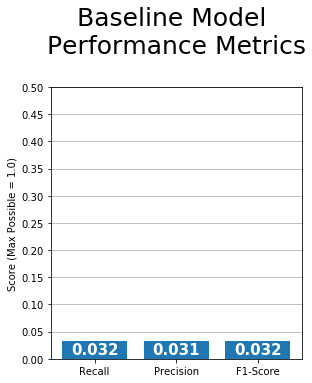

In [872]:
text_settings={'color':'white', 'fontweight':'bold','fontsize':15,'ha':'center','va':'center'}
fig, ax = plt.subplots(figsize=(4.5,5))
ax.grid(axis='y')

plot_vals = values_for_bar_graph(variable)
plt.title('Baseline Model \nPerformance Metrics\n',fontsize=25)
plt.yticks(np.linspace(0,.5,11))
plt.ylim([0,.5])
plt.ylabel('Score (Max Possible = 1.0)')
plt.xticks([0,1,2],('Recall','Precision','F1-Score'))
plt.bar([0,1,2],[t_dummy_dict['Recall'],t_dummy_dict['Precision'],t_dummy_dict['F1 Score']])
for ind,score in enumerate([t_dummy_dict['Recall'],t_dummy_dict['Precision'],t_dummy_dict['F1 Score']]):
    ax.text(ind,score-.5*score,str(score)[:5],**text_settings)

In [465]:
dm.fit(X,y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [466]:
metrics.confusion_matrix(y,dm.predict(X),labels=[0,1])

array([[411077,  13065],
       [ 13118,    432]])

In [475]:
metrics.recall_score(y,dm.predict(X))

0.031734317343173432

In [476]:
metrics.precision_score(y,dm.predict(X))

0.031964141377029909

In [477]:
metrics.f1_score(y,dm.predict(X))

0.030537187012408054

In [661]:
logr = LogisticRegression(class_weight='balanced')
scores1 = cross_val_score(logr,X,y,cv=cross_validator,scoring="f1",n_jobs=-1)
print("F1",scores1)
scores2 = cross_val_score(logr,X,y,cv=cross_validator,scoring="recall",n_jobs=-1)
print("Recall",scores2)
scores3 = cross_val_score(logr,X,y,cv=cross_validator,scoring="precision",n_jobs=-1)
print("Precision",scores3)

F1 [ 0.17142098  0.16700884  0.17151333  0.16859919  0.16831103]
Recall [ 0.70957096  0.69193787  0.70147059  0.69329897  0.69623556]
Precision [ 0.09748602  0.09496498  0.09770086  0.09596861  0.09572615]


In [479]:
logr.fit(X,y)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [480]:
metrics.confusion_matrix(y,logr.predict(X),labels=[0,1])

array([[335492,  88650],
       [  4086,   9464]])

In [481]:
predict_proba_logr = logr.predict_proba(X)
predict_proba_logr = [probs[1] for probs in predict_proba_logr]

In [482]:
predict_proba_logr[:8]

[0.84227284373148648,
 0.61817216615758641,
 0.25543739312114572,
 0.68609574647418292,
 0.23439373368390823,
 0.94964535334962619,
 0.17489713140073559,
 0.923508942390317]

In [483]:
predict_y_logr[:8]

array([1, 1, 0, 1, 0, 1, 0, 0])

In [484]:
true_vs_pred_logr_df = pd.DataFrame(data={'True_y':y,'proba_y':predict_proba_logr})

In [485]:
true_vs_pred_logr_df.head()

,True_y,proba_y
0,1,0.842273
1,1,0.618172
2,1,0.255437
3,1,0.686096
4,1,0.234394


In [486]:
globthresh = 0.5

In [487]:
def assign_conf_matrix_label(row):
    if row.True_y == 1 and row.proba_y >= globthresh:
        return "TP"
    elif row.True_y == 1 and row.proba_y <globthresh:
        return "FN"
    elif row.True_y == 0 and row.proba_y >= globthresh:
        return "FP"
    else:
        return "TN"

# def pred_with_different_threshold(row):
#     if row.proba_y >= globthresh:
#         return 1
#     else:
#         return 0

In [662]:
def conf_mat_score(dict_with_TP_TN_FP_FN):
    """
    returns accuracy, precision, recall, and F1 scores based on a confusion matrix
    """
    tn=dict_with_TP_TN_FP_FN['TN']
    tp=dict_with_TP_TN_FP_FN['TP']
    fn=dict_with_TP_TN_FP_FN['FN']
    fp=dict_with_TP_TN_FP_FN['FP']
    accuracy_ = (tp+tn)/(tp+tn+fp+fn)
    recall_ = (tp)/(tp+fn)
    prec_ = tp/(tp+fp)
    f1_score = 2*recall_*prec_/(recall_+prec_)
    print('Accuracy:',accuracy_)
    print('Recall:',recall_)
    print('Precision:',prec_)
    print('F1 Score:',f1_score)
    return {'Accuracy':accuracy_,'Recall':recall_,'Precision':prec_,'F1 Score':f1_score}


(array([  72629.,  151564.,   57452.,   43032.,   28777.,   24977.,
          11393.,   16771.,   12827.,    4720.]),
 array([ 0.09814195,  0.18825402,  0.27836609,  0.36847816,  0.45859023,
         0.5487023 ,  0.63881437,  0.72892644,  0.81903851,  0.90915058,
         0.99926265]),
 <a list of 10 Patch objects>)

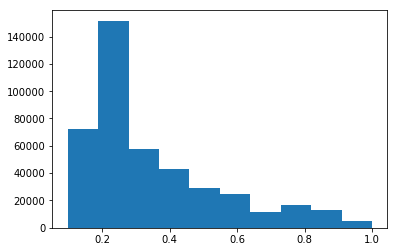

In [489]:
plt.hist(true_vs_pred_logr_df.proba_y[(true_vs_pred_logr_df.True_y==0)])
# &(true_vs_pred_logr_df.proba_y>=0.3)&(true_vs_pred_logr_df.proba_y<=0.65)])

(array([  803.,  1204.,  1167.,   743.,   947.,  1062.,   828.,  2007.,
         2703.,  2086.]),
 array([ 0.12021823,  0.20799739,  0.29577655,  0.38355571,  0.47133487,
         0.55911403,  0.64689319,  0.73467235,  0.82245151,  0.91023067,
         0.99800983]),
 <a list of 10 Patch objects>)

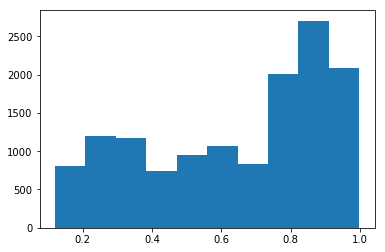

In [490]:
plt.hist(true_vs_pred_logr_df.proba_y[true_vs_pred_logr_df.True_y==1])

plt.hist(true_vs_pred_logr_df.proba_y[(true_vs_pred_logr_df.True_y==0)&(true_vs_pred_logr_df.proba_y>=.54)&(true_vs_pred_logr_df.proba_y<=.57)])
# plt.hist(true_vs_pred_logr_df.proba_y[true_vs_pred_logr_df.proba_y>=.5])

plt.hist(true_vs_pred_logr_df.proba_y[(true_vs_pred_logr_df.True_y==1)&(true_vs_pred_logr_df.proba_y>=.54)&(true_vs_pred_logr_df.proba_y<=.57)])
# plt.hist(true_vs_pred_logr_df.proba_y[true_vs_pred_logr_df.proba_y>=.5])

In [491]:
globthresh = 0.500
true_vs_pred_logr_df['Confusion_label_500'] = true_vs_pred_logr_df.apply(assign_conf_matrix_label,axis=1)

In [492]:
true_vs_pred_logr_df.head()

,True_y,proba_y,Confusion_label_500
0,1,0.842273,TP
1,1,0.618172,TP
2,1,0.255437,FN
3,1,0.686096,TP
4,1,0.234394,FN


In [493]:
true_vs_pred_logr_df.Confusion_label_500.value_counts()

TN    335492
FP     88650
TP      9464
FN      4086
Name: Confusion_label_500, dtype: int64

In [494]:
conf_mat_score(dict(true_vs_pred_logr_df.Confusion_label_500.value_counts()))

Accuracy: 0.788124982865
Recall: 0.698450184502
Precision: 0.0964592209063
F1 Score: 0.169508525577


In [495]:
globthresh = 0.550
true_vs_pred_logr_df['Confusion_label_550'] = true_vs_pred_logr_df.apply(assign_conf_matrix_label,axis=1)

In [496]:
true_vs_pred_logr_df.head()

,True_y,proba_y,Confusion_label_500,Confusion_label_550
0,1,0.842273,TP,TP
1,1,0.618172,TP,TP
2,1,0.255437,FN,FN
3,1,0.686096,TP,TP
4,1,0.234394,FN,FN


In [497]:
true_vs_pred_logr_df.Confusion_label_550.value_counts()

TN    353613
FP     70529
TP      8850
FN      4700
Name: Confusion_label_550, dtype: int64

In [498]:
conf_mat_score(dict(true_vs_pred_logr_df.Confusion_label_550.value_counts()))

Accuracy: 0.828123429261
Recall: 0.653136531365
Precision: 0.111490444576
F1 Score: 0.190467991693


In [499]:
globthresh = 0.600
true_vs_pred_logr_df['Confusion_label_600'] = true_vs_pred_logr_df.apply(assign_conf_matrix_label,axis=1)

In [500]:
true_vs_pred_logr_df.head()

,True_y,proba_y,Confusion_label_500,Confusion_label_550,Confusion_label_600
0,1,0.842273,TP,TP,TP
1,1,0.618172,TP,TP,TP
2,1,0.255437,FN,FN,FN
3,1,0.686096,TP,TP,TP
4,1,0.234394,FN,FN,FN


In [501]:
true_vs_pred_logr_df.Confusion_label_600.value_counts()

TN    367131
FP     57011
TP      8313
FN      5237
Name: Confusion_label_600, dtype: int64

In [502]:
conf_mat_score(dict(true_vs_pred_logr_df.Confusion_label_600.value_counts()))

Accuracy: 0.857781270848
Recall: 0.613505535055
Precision: 0.127257975629
F1 Score: 0.210791895935


In [510]:
globthresh = 0.750
true_vs_pred_logr_df['Confusion_label_750'] = true_vs_pred_logr_df.apply(assign_conf_matrix_label,axis=1)

In [511]:
true_vs_pred_logr_df.head()

,True_y,proba_y,Confusion_label_500,Confusion_label_550,Confusion_label_600,Confusion_label_750
0,1,0.842273,TP,TP,TP,TP
1,1,0.618172,TP,TP,TP,FN
2,1,0.255437,FN,FN,FN,FN
3,1,0.686096,TP,TP,TP,FN
4,1,0.234394,FN,FN,FN,FN


In [512]:
true_vs_pred_logr_df.Confusion_label_750.value_counts()

TN    391104
FP     33038
FN      6857
TP      6693
Name: Confusion_label_750, dtype: int64

In [513]:
conf_mat_score(dict(true_vs_pred_logr_df.Confusion_label_750.value_counts()))

Accuracy: 0.908851429773
Recall: 0.493948339483
Precision: 0.168457879238
F1 Score: 0.251234023385


In [514]:
globthresh = 0.800
true_vs_pred_logr_df['Confusion_label_800'] = true_vs_pred_logr_df.apply(assign_conf_matrix_label,axis=1)

In [515]:
true_vs_pred_logr_df.head()

,True_y,proba_y,Confusion_label_500,Confusion_label_550,Confusion_label_600,Confusion_label_750,Confusion_label_800
0,1,0.842273,TP,TP,TP,TP,TP
1,1,0.618172,TP,TP,TP,FN,FN
2,1,0.255437,FN,FN,FN,FN,FN
3,1,0.686096,TP,TP,TP,FN,FN
4,1,0.234394,FN,FN,FN,FN,FN


In [516]:
true_vs_pred_logr_df.Confusion_label_800.value_counts()

TN    402723
FP     21419
FN      8167
TP      5383
Name: Confusion_label_800, dtype: int64

In [517]:
conf_mat_score(dict(true_vs_pred_logr_df.Confusion_label_800.value_counts()))

Accuracy: 0.932404521901
Recall: 0.397269372694
Precision: 0.200843220655
F1 Score: 0.266802141158


In [527]:
globthresh = 0.810
true_vs_pred_logr_df['Confusion_label_810'] = true_vs_pred_logr_df.apply(assign_conf_matrix_label,axis=1)

In [528]:
true_vs_pred_logr_df.head()

,True_y,proba_y,Confusion_label_500,Confusion_label_550,Confusion_label_600,Confusion_label_750,Confusion_label_800,Confusion_label_850,Confusion_label_780,Confusion_label_810
0,1,0.842273,TP,TP,TP,TP,TP,FN,TP,TP
1,1,0.618172,TP,TP,TP,FN,FN,FN,FN,FN
2,1,0.255437,FN,FN,FN,FN,FN,FN,FN,FN
3,1,0.686096,TP,TP,TP,FN,FN,FN,FN,FN
4,1,0.234394,FN,FN,FN,FN,FN,FN,FN,FN


In [529]:
true_vs_pred_logr_df.Confusion_label_810.value_counts()

TN    404947
FP     19195
FN      8464
TP      5086
Name: Confusion_label_810, dtype: int64

In [663]:
conf_mat_score(dict(true_vs_pred_logr_df.Confusion_label_810.value_counts()))

Accuracy: 0.9368071612
Recall: 0.375350553506
Precision: 0.209464190107
F1 Score: 0.268880019032


{'Accuracy': 0.93680716120011331,
 'F1 Score': 0.26888001903201081,
 'Precision': 0.20946419010749145,
 'Recall': 0.37535055350553503}

In [664]:
t_810_dict = conf_mat_score(dict(true_vs_pred_logr_df.Confusion_label_810.value_counts()))

Accuracy: 0.9368071612
Recall: 0.375350553506
Precision: 0.209464190107
F1 Score: 0.268880019032


In [845]:
globthresh = 0.850
true_vs_pred_logr_df['Confusion_label_850'] = true_vs_pred_logr_df.apply(assign_conf_matrix_label,axis=1)

In [846]:
true_vs_pred_logr_df.head()

,True_y,proba_y,Confusion_label_500,Confusion_label_550,Confusion_label_600,Confusion_label_750,Confusion_label_800,Confusion_label_850,Confusion_label_780,Confusion_label_810,Confusion_label_820,Confusion_label_830
0,1,0.842273,TP,TP,TP,TP,TP,FN,TP,TP,TP,TP
1,1,0.618172,TP,TP,TP,FN,FN,FN,FN,FN,FN,FN
2,1,0.255437,FN,FN,FN,FN,FN,FN,FN,FN,FN,FN
3,1,0.686096,TP,TP,TP,FN,FN,FN,FN,FN,FN,FN
4,1,0.234394,FN,FN,FN,FN,FN,FN,FN,FN,FN,FN


In [847]:
true_vs_pred_logr_df.Confusion_label_850.value_counts()

TN    413711
FP     10431
FN     10035
TP      3515
Name: Confusion_label_850, dtype: int64

In [848]:
conf_mat_score(dict(true_vs_pred_logr_df.Confusion_label_850.value_counts()))

Accuracy: 0.953241091909
Recall: 0.259409594096
Precision: 0.25204359673
F1 Score: 0.255673552517


{'Accuracy': 0.95324109190937922,
 'F1 Score': 0.25567355251672974,
 'Precision': 0.25204359673024523,
 'Recall': 0.25940959409594094}

In [851]:
t_850_dict = conf_mat_score(dict(true_vs_pred_logr_df.Confusion_label_850.value_counts()))

Accuracy: 0.953241091909
Recall: 0.259409594096
Precision: 0.25204359673
F1 Score: 0.255673552517


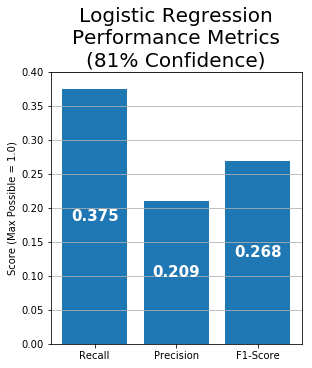

In [994]:
text_settings={'color':'white', 'fontweight':'bold','fontsize':15,'ha':'center','va':'center'}
fig, ax = plt.subplots(figsize=(4.5,5))
ax.grid(axis='y')

plot_vals = values_for_bar_graph(variable)
plt.title('Logistic Regression\nPerformance Metrics\n(81% Confidence)',fontsize=20)
plt.yticks(np.linspace(0,1,21))
plt.ylim([0,.4])
plt.ylabel('Score (Max Possible = 1.0)')
plt.xticks([0,1,2],('Recall','Precision','F1-Score'))
plt.bar([0,1,2],[t_810_dict['Recall'],t_810_dict['Precision'],t_810_dict['F1 Score']])
for ind,score in enumerate([t_810_dict['Recall'],t_810_dict['Precision'],t_810_dict['F1 Score']]):
    ax.text(ind,score-.5*score,str(score)[:5],**text_settings)

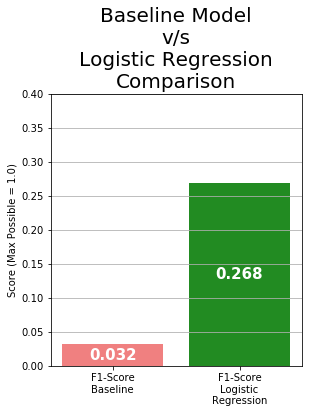

In [993]:
text_settings={'color':'white', 'fontweight':'bold','fontsize':15,'ha':'center','va':'center'}
fig, ax = plt.subplots(figsize=(4.5,5))
ax.grid(axis='y')

plot_vals = values_for_bar_graph(variable)
plt.title('Baseline Model\nv/s\nLogistic Regression\nComparison',fontsize=20)
plt.yticks(np.linspace(0,1,21))
plt.ylim([0,.4])
plt.ylabel('Score (Max Possible = 1.0)')
plt.xticks([0,1],('F1-Score\nBaseline','F1-Score\nLogistic\nRegression'))
plt.bar([0,1],[t_dummy_dict['F1 Score'],t_810_dict['F1 Score']],color=['lightcoral','forestgreen'])
for ind,score in enumerate([t_dummy_dict['F1 Score'],t_810_dict['F1 Score']]):
    ax.text(ind,score-.5*score,str(score)[:5],**text_settings)

In [531]:
logr.fit(X,y)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [418]:
metrics.recall_score(y,logr.predict(X))

0.61542435424354247

In [420]:
metrics.precision_score(y,logr.predict(X))

0.046665062479364743

In [422]:
metrics.f1_score(y,logr.predict(X))

0.08675207673381917

In [532]:
logr.coef_

array([[-0.13069512, -0.11297899, -0.05765478, -0.02458646,  0.15514715,
         0.24616999,  0.44815745,  0.3525248 ,  0.24470808,  0.13143327,
         0.11279582,  0.17099359,  1.08409916,  0.02724224,  0.0361301 ,
        -0.24215117,  0.32091927,  0.3389739 ,  0.08768962, -0.08124892,
        -0.04209513, -0.16440896, -0.61464556,  0.2548709 , -0.096982  ,
         0.09244131, -0.11568217,  0.24840183,  0.11243015,  0.5077168 ,
        -0.20689365, -0.05262857,  0.33452037,  0.31322012,  0.66866384,
         0.58926982,  1.21935443,  2.79094362,  2.00374414,  2.78340198,
         0.44663979]])

In [533]:
len(list(logr.coef_[0]))

41

In [534]:
len(X.columns)

41

In [535]:
coef_variable_assoc = []
for a,b in zip(logr.coef_[0],X.columns):
    coef_variable_assoc.append((a,b))

In [536]:
abs_coef_variable_assoc = []
for a,b in zip(logr.coef_[0],X.columns):
    abs_coef_variable_assoc.append((abs(a),b))

In [769]:
np.exp(1.21)

3.3534846525490236

In [875]:
for val,label in sorted(coef_variable_assoc,reverse=True)[:9]:
    print(np.exp(val),pos_coef_dict[label])

16.2963901977 Pedestrian Involved
16.1739508905 Motorcycle Involved
7.41677358771 Bicycle Involved
3.38500177313 Alcohol Involved
2.95677502962 Rural Unincorporated Area
1.95162788169 Dark No Street Lights
1.80267165868 Dark Streetlights not functioning
1.66149333668 Other Road Condition?
1.56542515225 Small Town (Pop:2500 - 10000)


In [538]:
sorted(coef_variable_assoc,reverse=True)

[(2.7909436230240248, 'PEDESTRIAN_ACCIDENT_Y'),
 (2.7834019783481141, 'MOTORCYCLE_ACCIDENT_Y'),
 (2.0037441361609907, 'BICYCLE_ACCIDENT_Y'),
 (1.219354430182926, 'ALCOHOL_INVOLVED_Y'),
 (1.0840991573605867, 'POPULATION_9'),
 (0.66866383543748065, 'LIGHTING_D'),
 (0.589269819304161, 'LIGHTING_E'),
 (0.50771679837786887, 'ROAD_COND_1_G'),
 (0.44815744987947281, 'POPULATION_2'),
 (0.44663979027257811, 'TRUCK_ACCIDENT_Y'),
 (0.35252479645586215, 'POPULATION_3'),
 (0.33897390142713024, 'WEATHER_1_F'),
 (0.33452036784603245, 'LIGHTING_B'),
 (0.32091926703880835, 'WEATHER_1_E'),
 (0.31322012102969765, 'LIGHTING_C'),
 (0.25487090403111706, 'ROAD_COND_1_A'),
 (0.24840183374652675, 'ROAD_COND_1_E'),
 (0.24616999248343394, 'DAY_OF_WEEK_7'),
 (0.24470808358233498, 'POPULATION_4'),
 (0.17099358702890308, 'POPULATION_7'),
 (0.15514714542462663, 'DAY_OF_WEEK_6'),
 (0.13143326557410384, 'POPULATION_5'),
 (0.11279582482890477, 'POPULATION_6'),
 (0.11243014665355228, 'ROAD_COND_1_F'),
 (0.09244131294908

In [540]:
#variables associated with lower probabilities
sorted(coef_variable_assoc)[:6]

[(-0.61464555975684154, 'ROAD_SURFACE_D'),
 (-0.24215116811862694, 'WEATHER_1_D'),
 (-0.20689365478300045, 'ROAD_COND_2_H'),
 (-0.1644089602728972, 'ROAD_SURFACE_C'),
 (-0.13069511537448514, 'DAY_OF_WEEK_2'),
 (-0.11568217315868751, 'ROAD_COND_1_D')]

In [550]:
neg_assoc_coef = [a[1] for a in sorted(coef_variable_assoc)[:6]]
neg_assoc_coef_descriptions = ['Slippery Road (Mud/Oil not snowy or icy)','Snowing-Weather','No Unusual Road Condition','Snowy or Icy Road','Tuesday (Means Monday is more popular for accidents)','Construction or Repair Zone']

neg_coef_dict = dict()
for name,desc in zip(neg_assoc_coef,neg_assoc_coef_descriptions):
    neg_coef_dict[name] = desc

In [922]:
neg_assoc_coef = [a[1] for a in sorted(coef_variable_assoc)[:15]]
neg_assoc_coef_names = deepcopy(neg_assoc_coef)
neg_assoc_coef_values = [a[0] for a in sorted(coef_variable_assoc)[:15]]

neg_assoc_odds = [np.exp(a) for a in neg_assoc_coef_values]
neg_assoc_coef_descriptions = ['Slippery Road (Mud/Oil not snowy or icy)','Snowing-Weather','No Unusual Road Condition','Snowy or Icy Road','Tuesday (Means Monday is more popular for accidents)','Construction or Repair Zone']
neg_coef_dict = dict()
for name,desc in zip(neg_assoc_coef_names,neg_assoc_coef_descriptions):
    neg_coef_dict[name] = desc

neg_assoc_odds_dict = dict()
for name,odds in zip(neg_assoc_coef_names,neg_assoc_odds):
    neg_assoc_odds_dict[name] = odds


In [925]:
sorted(coef_variable_assoc)[:15]

[(-0.61464555975684154, 'ROAD_SURFACE_D'),
 (-0.24215116811862694, 'WEATHER_1_D'),
 (-0.20689365478300045, 'ROAD_COND_2_H'),
 (-0.1644089602728972, 'ROAD_SURFACE_C'),
 (-0.13069511537448514, 'DAY_OF_WEEK_2'),
 (-0.11568217315868751, 'ROAD_COND_1_D'),
 (-0.11297898982963094, 'DAY_OF_WEEK_3'),
 (-0.096981995224467182, 'ROAD_COND_1_B'),
 (-0.08124891880203261, 'ROAD_SURFACE_A'),
 (-0.057654779981052506, 'DAY_OF_WEEK_4'),
 (-0.052628572124446243, 'LIGHTING_A'),
 (-0.042095128064460384, 'ROAD_SURFACE_B'),
 (-0.0245864550504988, 'DAY_OF_WEEK_5'),
 (0.027242242376795046, 'WEATHER_1_B'),
 (0.036130099625108887, 'WEATHER_1_C')]

In [923]:
neg_assoc_odds_dict

{'DAY_OF_WEEK_2': 0.87748526537855653,
 'DAY_OF_WEEK_3': 0.89316942556068168,
 'DAY_OF_WEEK_4': 0.94397577052662318,
 'DAY_OF_WEEK_5': 0.9757133299266183,
 'LIGHTING_A': 0.9487323326822733,
 'ROAD_COND_1_B': 0.90757234662254949,
 'ROAD_COND_1_D': 0.89075828520491351,
 'ROAD_COND_2_H': 0.81310611533618049,
 'ROAD_SURFACE_A': 0.92196416866314468,
 'ROAD_SURFACE_B': 0.95877856948462503,
 'ROAD_SURFACE_C': 0.84839499107706196,
 'ROAD_SURFACE_D': 0.54083255416351039,
 'WEATHER_1_B': 1.0276167049279823,
 'WEATHER_1_C': 1.0367907238014726,
 'WEATHER_1_D': 0.78493751105597398}

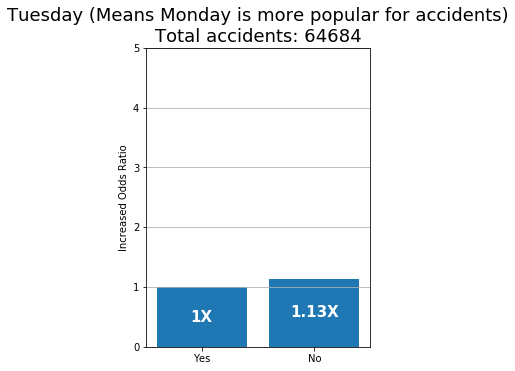

In [933]:
var_of_int = neg_assoc_coef_names[4]

text_settings={'color':'white', 'fontweight':'bold','fontsize':15,'ha':'center','va':'center'}
fig, ax = plt.subplots(figsize=(4,5.5))

plt.grid(axis='y')
plot_vals = values_for_bar_graph_odds_neg(var_of_int)
plt.title(neg_coef_dict[var_of_int]+'\nTotal accidents: '+str(plot_vals[-1]),fontsize=18)
plt.ylabel('Increased Odds Ratio')
plt.yticks(np.arange(0,29,1))
plt.ylim([0,5])
plt.xticks([0,1],('Yes','No'))
plt.bar([0,1],plot_vals[:-1])
for ind,score in enumerate(plot_vals[:-1]):
    ax.text(ind,score-.5*score,str(score)[:4]+'X',**text_settings)

In [581]:
neg_coef_dict

{'DAY_OF_WEEK_2': 'Tuesday (Means Monday is more popular for accidents)',
 'ROAD_COND_1_D': 'Construction or Repair Zone',
 'ROAD_COND_2_H': 'No Unusual Road Condition',
 'ROAD_SURFACE_C': 'Snowy or Icy Road',
 'ROAD_SURFACE_D': 'Slippery Road (Mud/Oil not snowy or icy)',
 'WEATHER_1_D': 'Snowing-Weather'}

In [569]:
neg_assoc_coef

['ROAD_SURFACE_D',
 'WEATHER_1_D',
 'ROAD_COND_2_H',
 'ROAD_SURFACE_C',
 'DAY_OF_WEEK_2',
 'ROAD_COND_1_D']

In [683]:
def values_for_bar_graph(variable_name):
    caco = cali_collision_records_df_dummies
    count_v_sev = len(caco[(caco[variable_name]==1) & (caco['Is_SEVERE_or_Fatal']==1)])
    count_v_tot =len(caco[caco[variable_name]==1])
    count_notv_sev =len(caco[(caco[variable_name]!=1)& (caco['Is_SEVERE_or_Fatal']==1)])
    count_notv_tot =len(caco[caco[variable_name]!=1])
    output_unstandardized_var = count_v_sev/count_v_tot
    output_unstandardized_notvar = count_notv_sev/count_notv_tot
    output_standardized_var = output_unstandardized_var / min([output_unstandardized_var,output_unstandardized_notvar])
    output_standardized_notvar = output_unstandardized_notvar / min([output_unstandardized_var,output_unstandardized_notvar])
    return [output_standardized_var,output_standardized_notvar,count_v_tot]


In [897]:
def values_for_bar_graph_odds(variable_name):
    caco = cali_collision_records_df_dummies
    count_v_tot =len(caco[caco[variable_name]==1])
    output_odds = max(pos_assoc_odds_dict[variable_name],1)
    output_comp = max(1,1/pos_assoc_odds_dict[variable_name])
    return [output_odds,output_comp,count_v_tot]



In [926]:
def values_for_bar_graph_odds_neg(variable_name):
    caco = cali_collision_records_df_dummies
    count_v_tot =len(caco[caco[variable_name]==1])
    output_odds = max(neg_assoc_odds_dict[variable_name],1)
    output_comp = max(1,1/neg_assoc_odds_dict[variable_name])
    return [output_odds,output_comp,count_v_tot]



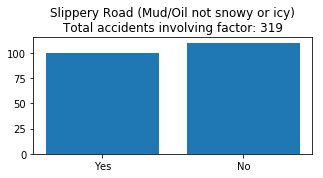

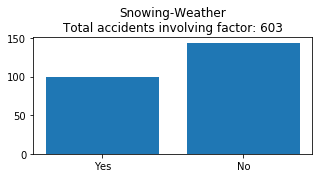

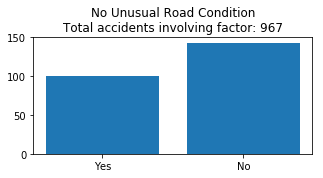

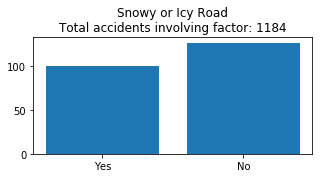

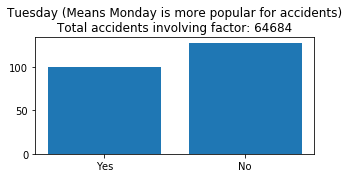

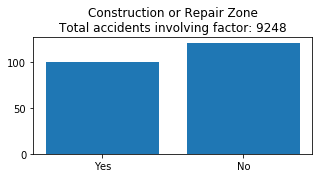

In [630]:
for ind,variable in enumerate(neg_assoc_coef):
    plt.figure(figsize=[5,15])
    plt.subplot(int(str(len(neg_assoc_coef))+'1'+str(ind+1)))
    plot_vals = values_for_bar_graph(variable)
    plt.title(neg_coef_dict[variable]+'\nTotal accidents involving factor: '+str(plot_vals[-1]))
    plt.xticks([0,1],('Yes','No'))
    plt.bar([0,1],plot_vals[:-1])


In [636]:
#variables associated with higher probabilities
sorted(coef_variable_assoc,reverse=True)[:12]

[(2.7909436230240248, 'PEDESTRIAN_ACCIDENT_Y'),
 (2.7834019783481141, 'MOTORCYCLE_ACCIDENT_Y'),
 (2.0037441361609907, 'BICYCLE_ACCIDENT_Y'),
 (1.219354430182926, 'ALCOHOL_INVOLVED_Y'),
 (1.0840991573605867, 'POPULATION_9'),
 (0.66866383543748065, 'LIGHTING_D'),
 (0.589269819304161, 'LIGHTING_E'),
 (0.50771679837786887, 'ROAD_COND_1_G'),
 (0.44815744987947281, 'POPULATION_2'),
 (0.44663979027257811, 'TRUCK_ACCIDENT_Y'),
 (0.35252479645586215, 'POPULATION_3'),
 (0.33897390142713024, 'WEATHER_1_F')]

['PEDESTRIAN_ACCIDENT_Y']

In [893]:
pos_assoc_coef = [a[1] for a in sorted(coef_variable_assoc,reverse=True)[:15]]
pos_assoc_coef_names = deepcopy(pos_assoc_coef)
pos_assoc_coef_values = [a[0] for a in sorted(coef_variable_assoc,reverse=True)[:15]]

pos_assoc_odds = [np.exp(a) for a in pos_assoc_coef_values]
pos_assoc_coef_descriptions = ['Pedestrian Involved','Motorcycle Involved','Bicycle Involved','Alcohol Involved','Rural Unincorporated Area', 'Dark No Street Lights','Dark Streetlights not functioning','Other Road Condition?','Small Town (Pop:2500 - 10000)','Truck Involved','Med Town (Pop:10000 - 25000)']

pos_coef_dict = dict()
for name,desc in zip(pos_assoc_coef_names,pos_assoc_coef_descriptions):
    pos_coef_dict[name] = desc

pos_assoc_odds_dict = dict()
for name,odds in zip(pos_assoc_coef_names,pos_assoc_odds):
    pos_assoc_odds_dict[name] = odds


In [895]:
pos_assoc_odds_dict

{'ALCOHOL_INVOLVED_Y': 3.3850017731267221,
 'BICYCLE_ACCIDENT_Y': 7.4167735877123429,
 'LIGHTING_B': 1.3972700488346781,
 'LIGHTING_C': 1.3678225844080232,
 'LIGHTING_D': 1.9516278816895041,
 'LIGHTING_E': 1.8026716586750902,
 'MOTORCYCLE_ACCIDENT_Y': 16.173950890545655,
 'PEDESTRIAN_ACCIDENT_Y': 16.296390197717226,
 'POPULATION_2': 1.5654251522522775,
 'POPULATION_3': 1.4226549321114941,
 'POPULATION_9': 2.9567750296200357,
 'ROAD_COND_1_G': 1.6614933366762019,
 'TRUCK_ACCIDENT_Y': 1.563051171633997,
 'WEATHER_1_E': 1.3783942945484877,
 'WEATHER_1_F': 1.4035067152124527}

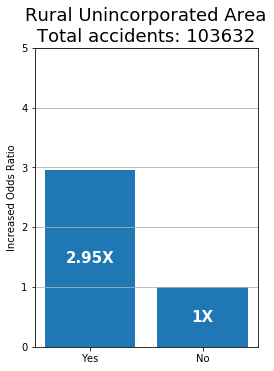

In [919]:
var_of_int = pos_assoc_coef_names[4]

text_settings={'color':'white', 'fontweight':'bold','fontsize':15,'ha':'center','va':'center'}
fig, ax = plt.subplots(figsize=(4,5.5))

plt.grid(axis='y')
plot_vals = values_for_bar_graph_odds(var_of_int)
plt.title(pos_coef_dict[var_of_int]+'\nTotal accidents: '+str(plot_vals[-1]),fontsize=18)
plt.ylabel('Increased Odds Ratio')
plt.yticks(np.arange(0,29,1))
plt.ylim([0,5])
plt.xticks([0,1],('Yes','No'))
plt.bar([0,1],plot_vals[:-1])
for ind,score in enumerate(plot_vals[:-1]):
    ax.text(ind,score-.5*score,str(score)[:4]+'X',**text_settings)

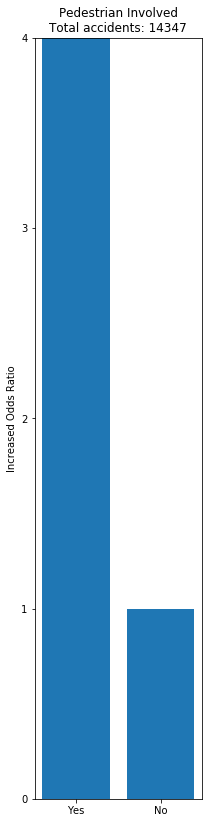

In [877]:
text_settings={'color':'white', 'fontweight':'bold','fontsize':15,'ha':'center','va':'center'}

for ind,variable in enumerate(pos_assoc_coef):
    fig, ax = plt.subplots(figsize=(3,14))
    plt.subplot(int(str(len(pos_assoc_coef))+'1'+str(ind+1)))
    plot_vals = values_for_bar_graph(variable)
    plt.title(pos_coef_dict[variable]+'\nTotal accidents: '+str(plot_vals[-1]))
    plt.ylabel('Increased Odds Ratio')
    plt.yticks(np.arange(0,9,1))
    plt.ylim([0,4])
    plt.xticks([0,1],('Yes','No'))
    plt.bar([0,1],plot_vals[:-1])
    for ind,score in enumerate(plot_vals[:-1]):
        ax.text(ind,score-.5*score,str(score)[:5],**text_settings)

In [619]:
pos_assoc_coef

['PEDESTRIAN_ACCIDENT_Y',
 'MOTORCYCLE_ACCIDENT_Y',
 'BICYCLE_ACCIDENT_Y',
 'ALCOHOL_INVOLVED_Y',
 'POPULATION_9',
 'LIGHTING_D',
 'LIGHTING_E',
 'ROAD_COND_1_G',
 'POPULATION_2']

<Container object of 9 artists>

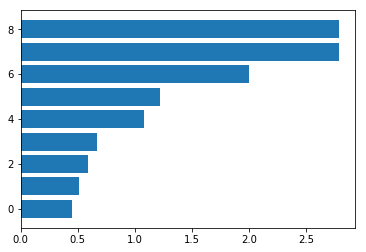

In [623]:
plt.barh(np.arange(len(pos_assoc_coef)),[a[0] for a in reversed(sorted(coef_variable_assoc,reverse=True)[:9])])

In [624]:
for i in pos_assoc_coef:
    print(pos_coef_dict[i])

Pedestrian Involved
Motorcycle Involved
Bicycle Involved
Alcohol Involved
Rural Unincorporated Area
Dark No Street Lights
Dark Streetlights not functioning
Other Road Condition?
Small Town (Pop:2500 - 10000)


In [598]:
pos_coef_dict

{'ALCOHOL_INVOLVED_Y': 'Alcohol Involved',
 'BICYCLE_ACCIDENT_Y': 'Bicycle Involved',
 'LIGHTING_D': 'Dark No Street Lights',
 'LIGHTING_E': 'Dark Streetlights not functioning',
 'MOTORCYCLE_ACCIDENT_Y': 'Motorcycle Involved',
 'PEDESTRIAN_ACCIDENT_Y': 'Pedestrian Involved',
 'POPULATION_2': 'Small Town (Pop:2500 - 10000)',
 'POPULATION_3': 'Med Town (Pop:10000 - 25000)',
 'POPULATION_9': 'Rural Unincorporated Area',
 'ROAD_COND_1_G': 'Other Road Condition?',
 'TRUCK_ACCIDENT_Y': 'Truck Involved'}

In [546]:
['Pedestrian Involved','Motorcycle Involved','Bicycle Involved','Alcohol Involved','Rural Unincorporated Area', 'Dark No Street Lights','Dark Streetlights not functioning','Other Road Condition?','Small Town (Pop:2500 - 10000)','Truck Involved','Med Town (Pop:10000 - 25000)']

['Pedestrian Involved',
 'Motorcycle Involved',
 'Bicycle Involved',
 'Alcohol Involved',
 'Rural Unincorporated Area',
 'Dark No Street Lights',
 'Dark Streetlights not functioning',
 'Other Road Condition?',
 'Small Town (Pop:2500 - 10000)',
 'Truck Involved',
 'Med Town (Pop:10000 - 25000)']

In [537]:
plt.bar()

[(2.7909436230240248, 'PEDESTRIAN_ACCIDENT_Y'),
 (2.7834019783481141, 'MOTORCYCLE_ACCIDENT_Y'),
 (2.0037441361609907, 'BICYCLE_ACCIDENT_Y'),
 (1.219354430182926, 'ALCOHOL_INVOLVED_Y'),
 (1.0840991573605867, 'POPULATION_9'),
 (0.66866383543748065, 'LIGHTING_D'),
 (0.61464555975684154, 'ROAD_SURFACE_D'),
 (0.589269819304161, 'LIGHTING_E'),
 (0.50771679837786887, 'ROAD_COND_1_G'),
 (0.44815744987947281, 'POPULATION_2'),
 (0.44663979027257811, 'TRUCK_ACCIDENT_Y'),
 (0.35252479645586215, 'POPULATION_3'),
 (0.33897390142713024, 'WEATHER_1_F'),
 (0.33452036784603245, 'LIGHTING_B'),
 (0.32091926703880835, 'WEATHER_1_E'),
 (0.31322012102969765, 'LIGHTING_C'),
 (0.25487090403111706, 'ROAD_COND_1_A'),
 (0.24840183374652675, 'ROAD_COND_1_E'),
 (0.24616999248343394, 'DAY_OF_WEEK_7'),
 (0.24470808358233498, 'POPULATION_4'),
 (0.24215116811862694, 'WEATHER_1_D'),
 (0.20689365478300045, 'ROAD_COND_2_H'),
 (0.17099358702890308, 'POPULATION_7'),
 (0.1644089602728972, 'ROAD_SURFACE_C'),
 (0.1551471454246

In [445]:
[a[1] for a in sorted(abs_coef_variable_assoc,reverse=True)]

['POPULATION_9',
 'LIGHTING_E',
 'POPULATION_2',
 'ROAD_COND_1_G',
 'POPULATION_7',
 'POPULATION_3',
 'LIGHTING_D',
 'POPULATION_4',
 'ROAD_SURFACE_C',
 'ROAD_COND_2_H',
 'POPULATION_5',
 'ROAD_COND_1_A',
 'LIGHTING_C',
 'POPULATION_6',
 'WEATHER_1_D',
 'DAY_OF_WEEK_7',
 'WEATHER_1_F',
 'ROAD_SURFACE_D',
 'ROAD_COND_1_B',
 'DAY_OF_WEEK_6',
 'LIGHTING_B',
 'ROAD_COND_1_D',
 'ROAD_COND_1_F',
 'ROAD_COND_1_E',
 'WEATHER_1_C',
 'LIGHTING_A',
 'WEATHER_1_E',
 'ROAD_SURFACE_B',
 'WEATHER_1_G',
 'DAY_OF_WEEK_2',
 'WEATHER_1_B',
 'DAY_OF_WEEK_3',
 'DAY_OF_WEEK_5',
 'ROAD_SURFACE_A',
 'ROAD_COND_1_C',
 'DAY_OF_WEEK_4']

In [445]:
['Rural','E - Dark - Street Lights Not Functioning',]

['POPULATION_9',
 'LIGHTING_E',
 'POPULATION_2',
 'ROAD_COND_1_G',
 'POPULATION_7',
 'POPULATION_3',
 'LIGHTING_D',
 'POPULATION_4',
 'ROAD_SURFACE_C',
 'ROAD_COND_2_H',
 'POPULATION_5',
 'ROAD_COND_1_A',
 'LIGHTING_C',
 'POPULATION_6',
 'WEATHER_1_D',
 'DAY_OF_WEEK_7',
 'WEATHER_1_F',
 'ROAD_SURFACE_D',
 'ROAD_COND_1_B',
 'DAY_OF_WEEK_6',
 'LIGHTING_B',
 'ROAD_COND_1_D',
 'ROAD_COND_1_F',
 'ROAD_COND_1_E',
 'WEATHER_1_C',
 'LIGHTING_A',
 'WEATHER_1_E',
 'ROAD_SURFACE_B',
 'WEATHER_1_G',
 'DAY_OF_WEEK_2',
 'WEATHER_1_B',
 'DAY_OF_WEEK_3',
 'DAY_OF_WEEK_5',
 'ROAD_SURFACE_A',
 'ROAD_COND_1_C',
 'DAY_OF_WEEK_4']

In [440]:
sorted(coef_variable_assoc)

[(-0.53667762235075533, 'ROAD_SURFACE_C'),
 (-0.5291842030165218, 'ROAD_COND_2_H'),
 (-0.35037433364572829, 'WEATHER_1_D'),
 (-0.33331304719501731, 'ROAD_SURFACE_D'),
 (-0.22441192155335188, 'ROAD_COND_1_D'),
 (-0.18647345771693899, 'WEATHER_1_C'),
 (-0.17779723270497327, 'LIGHTING_A'),
 (-0.14098842662986683, 'ROAD_SURFACE_B'),
 (-0.096213476681997881, 'DAY_OF_WEEK_2'),
 (-0.082688985720499805, 'WEATHER_1_B'),
 (-0.056111111798873847, 'DAY_OF_WEEK_3'),
 (-0.036223774282039961, 'ROAD_SURFACE_A'),
 (-0.016972662870537, 'ROAD_COND_1_C'),
 (0.0075547443043124151, 'DAY_OF_WEEK_4'),
 (0.041282936332378437, 'DAY_OF_WEEK_5'),
 (0.13005282518542702, 'WEATHER_1_G'),
 (0.14200420716782192, 'WEATHER_1_E'),
 (0.20818317773146747, 'ROAD_COND_1_E'),
 (0.21136720054227043, 'ROAD_COND_1_F'),
 (0.26509268192216534, 'LIGHTING_B'),
 (0.27226645276371075, 'DAY_OF_WEEK_6'),
 (0.28855704559934081, 'ROAD_COND_1_B'),
 (0.33756457172741111, 'WEATHER_1_F'),
 (0.34796226000276265, 'DAY_OF_WEEK_7'),
 (0.410853729

In [431]:
logr.coef_

array([[-0.09621348, -0.05611111,  0.00755474,  0.04128294,  0.27226645,
         0.34796226,  0.69486483,  0.61673498,  0.56509026,  0.48502573,
         0.41085373,  0.65544592,  1.21858528, -0.08268899, -0.18647346,
        -0.35037433,  0.14200421,  0.33756457,  0.13005283, -0.03622377,
        -0.14098843, -0.53667762, -0.33331305,  0.47192651,  0.28855705,
        -0.01697266, -0.22441192,  0.20818318,  0.2113672 ,  0.67788529,
        -0.5291842 , -0.17779723,  0.26509268,  0.41157314,  0.60024467,
         0.96098901]])

In [128]:
cali_collision_records_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437692 entries, 0 to 437691
Data columns (total 57 columns):
CASE_ID           437692 non-null int64
COLLISION_DATE    437692 non-null int64
COLLISION_TIME    437692 non-null int64
NUMBER_KILLED     437692 non-null int64
LATITUDE          203410 non-null float64
LONGITUDE         203410 non-null float64
DAY_OF_WEEK_2     437692 non-null uint8
DAY_OF_WEEK_3     437692 non-null uint8
DAY_OF_WEEK_4     437692 non-null uint8
DAY_OF_WEEK_5     437692 non-null uint8
DAY_OF_WEEK_6     437692 non-null uint8
DAY_OF_WEEK_7     437692 non-null uint8
POPULATION_2      437692 non-null uint8
POPULATION_3      437692 non-null uint8
POPULATION_4      437692 non-null uint8
POPULATION_5      437692 non-null uint8
POPULATION_6      437692 non-null uint8
POPULATION_7      437692 non-null uint8
POPULATION_9      437692 non-null uint8
WEATHER_1_A       437692 non-null uint8
WEATHER_1_B       437692 non-null uint8
WEATHER_1_C       437692 non-null uint8
WEATH







# Scratch

In [22]:
import string

In [23]:
alpha_converter = dict()
for index, letter in enumerate(string.ascii_uppercase):
    alpha_converter[letter] = index + 1

In [54]:
cali_collision_records_df_dummies = cali_collision_records_df_dummies.replace('-',np.NaN)

In [55]:
cali_collision_records_df_dummies = cali_collision_records_df_dummies.replace('- ',np.NaN)

In [68]:
cali_collision_records_df_dummies = cali_collision_records_df_dummies.replace(np.NaN,0)

In [56]:
cali_collision_records_df_dummies = cali_collision_records_df_dummies.replace('Y','1')

In [57]:
for alpha,num_code in alpha_converter.items():
    cali_collision_records_df_dummies = cali_collision_records_df_dummies.replace(alpha,num_code)

In [259]:
cali_collision_records_df_dummies.head()

,CASE_ID,COLLISION_DATE,COLLISION_TIME,NUMBER_KILLED,LATITUDE,LONGITUDE,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,...,ROAD_COND_2_E,ROAD_COND_2_F,ROAD_COND_2_G,ROAD_COND_2_H,LIGHTING_A,LIGHTING_B,LIGHTING_C,LIGHTING_D,LIGHTING_E,Is_Fatal
0,6292116,20150102,1844,1,NaN,NaN,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,6292117,20150104,1817,2,37.61089,121.82204,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,6292118,20150105,1650,1,37.50050,121.92909,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,6292119,20150113,1843,1,NaN,NaN,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,6292120,20150115,1350,1,34.07225,117.78874,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [70]:
oh = OneHotEncoder()

one_hot_collisions = oh.fit_transform(cali_collision_records_df_dummies)

In [101]:
one_hot_collisions.

(437692, 439768)

In [62]:
reg1 = re.compile('[a-zA-z]')
for col_name in cali_collision_records_df_dummies.columns:
    print(col_name)
    counter=0
    for record in cali_collision_records_df_dummies[col_name]:
        counter += 1
        if record == np.NaN:
            print(counter)

CASE_ID
COLLISION_DATE
COLLISION_TIME
DAY_OF_WEEK
POPULATION
WEATHER_1
WEATHER_2
LOCATION_TYPE
COLLISION_SEVERITY
NUMBER_KILLED
NUMBER_INJURED
PARTY_COUNT
PRIMARY_COLL_FACTOR
PCF_VIOL_CATEGORY
HIT_AND_RUN
TYPE_OF_COLLISION
MVIW
PED_ACTION
ROAD_SURFACE
ROAD_COND_1
ROAD_COND_2
LIGHTING
CONTROL_DEVICE
PEDESTRIAN_ACCIDENT
BICYCLE_ACCIDENT
MOTORCYCLE_ACCIDENT
TRUCK_ACCIDENT
NOT_PRIVATE_PROPERTY
ALCOHOL_INVOLVED
COUNT_SEVERE_INJ
COUNT_VISIBLE_INJ
COUNT_COMPLAINT_PAIN
COUNT_PED_KILLED
COUNT_PED_INJURED
COUNT_BICYCLIST_KILLED
COUNT_BICYCLIST_INJURED
COUNT_MC_KILLED
COUNT_MC_INJURED
LATITUDE
LONGITUDE


In [31]:
cali_collision_records_df_dummies.columns[(cali_collision_records_df_dummies == '340H').iloc[0]]



TypeError: Could not compare ['340H'] with block values

In [333]:
rcl = RandomForestClassifier(n_jobs=-1)
scores = cross_val_score(rcl,X,y,cv=cross_validator,scoring="f1",n_jobs=-1)
print("F1",scores)
scores = cross_val_score(rcl,X,y,cv=cross_validator,scoring="recall",n_jobs=-1)
print("Recall",scores)
scores = cross_val_score(rcl,X,y,cv=cross_validator,scoring="precision",n_jobs=-1)
print("Precision",scores)

F1 [ 0.          0.00073368  0.00072622  0.00073206  0.00221321]
Recall [ 0.          0.00036982  0.00036765  0.00036819  0.00111815]
Precision [ 0.          0.04545455  0.02941176  0.0625      0.10714286]


In [92]:
min(cali_collision_records_df.COLLISION_DATE)

20150101

In [404]:
knn = KNeighborsClassifier(n_jobs=-1)
scores = cross_val_score(knn,X,y,cv=cross_validator,scoring="f1",n_jobs=-1)
print("F1",scores)
scores = cross_val_score(knn,X,y,cv=cross_validator,scoring="recall",n_jobs=-1)
print("Recall",scores)
scores = cross_val_score(knn,X,y,cv=cross_validator,scoring="precision",n_jobs=-1)
print("Precision",scores)

Process ForkPoolWorker-606:
Process ForkPoolWorker-600:
Process ForkPoolWorker-605:
Process ForkPoolWorker-604:
Process ForkPoolWorker-598:
Process ForkPoolWorker-607:
Process ForkPoolWorker-603:
Process ForkPoolWorker-599:
Process ForkPoolWorker-608:
Process ForkPoolWorker-602:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/proc

TypeError: catching classes that do not inherit from BaseException is not allowed

Process ForkPoolWorker-594:
Process ForkPoolWorker-597:
Process ForkPoolWorker-593:
Process ForkPoolWorker-595:
Process ForkPoolWorker-596:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/farhaan/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._